In [18]:
#importing libraries
import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df_ = pd.read_csv('/content/drive/MyDrive/hr_job_analytics/aug_test.csv') #reading dataset
df=pd.read_csv('/content/drive/MyDrive/hr_job_analytics/aug_train.csv')

In [21]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [22]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [23]:
df.shape

(19158, 14)

In [24]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [26]:
#replacing the missing values with the most frequent value
df= df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


In [27]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [28]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0.0


target=1, looking for job change

target=0, not looking for job change

#### Exploratory Data Analysis

In [29]:
df['target'].value_counts()[1]
#no. of people looking for job change

4777

In [30]:
df.duplicated().sum()

0

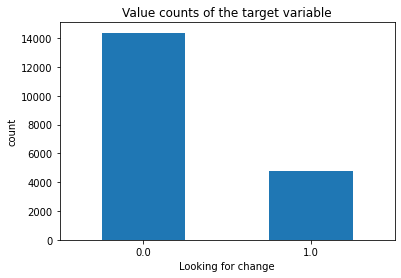

In [31]:
df.target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xticks(rotation=0)
plt.xlabel('Looking for change')
plt.ylabel('count')
plt.show()


From the above graph, we can conclude that our dataset is imbalanced since there are very less number of people who are looking for a job change.

In [32]:
df.drop('city', axis=1, inplace=True)
df_.drop('city', axis=1,inplace=True)

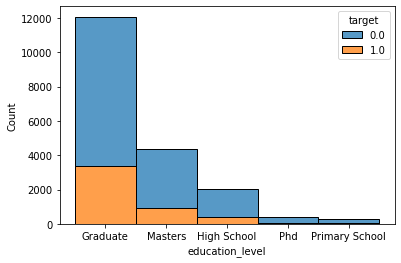

In [33]:
sns.histplot(data=df, x="education_level", hue="target", multiple="stack")

In [34]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
print("company type",df['company_type'].unique())
df['company_type']= label_encoder.fit_transform(df['company_type'])
print("company type",df['company_type'].unique())
print("gender",df['gender'].unique())
df['gender']= label_encoder.fit_transform(df['gender'])
print("gender",df['gender'].unique())
print("major_discipline",df['major_discipline'].unique())
df['major_discipline']= label_encoder.fit_transform(df['major_discipline'])
print("major_discipline",df['major_discipline'].unique())
print("education_level",df['education_level'].unique())
df['education_level']= label_encoder.fit_transform(df['education_level'])
print("education_level",df['education_level'].unique())
print("enrolled_university",df['enrolled_university'].unique())
df['enrolled_university']= label_encoder.fit_transform(df['enrolled_university'])
print("enrolled_university",df['enrolled_university'].unique())
print("relevent_experience",df['relevent_experience'].unique())
df['relevent_experience']= label_encoder.fit_transform(df['relevent_experience'])
print("relevent_experience",df['relevent_experience'].unique())
print("experience",df['experience'].unique())
df['experience']= label_encoder.fit_transform(df['experience'])
print("experience",df['experience'].unique())
print("company_size",df['company_size'].unique())
df['company_size']= label_encoder.fit_transform(df['company_size'])
print("company_size",df['company_size'].unique())
print("last_new_job",df['last_new_job'].unique())
df['last_new_job']= label_encoder.fit_transform(df['last_new_job'])
print("last_new_job",df['last_new_job'].unique())

company type ['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other' 'Public Sector'
 'NGO']
company type [5 1 0 3 4 2]
gender ['Male' 'Female' 'Other']
gender [1 0 2]
major_discipline ['STEM' 'Business Degree' 'Arts' 'Humanities' 'No Major' 'Other']
major_discipline [5 1 0 2 3 4]
education_level ['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
education_level [0 2 1 3 4]
enrolled_university ['no_enrollment' 'Full time course' 'Part time course']
enrolled_university [2 0 1]
relevent_experience ['Has relevent experience' 'No relevent experience']
relevent_experience [0 1]
experience ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20']
experience [21  6 15 20  2  4 17  8 11  7  0 14  1  5  9 10  3 13 16 19 18 12]
company_size ['50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_size [4 7 3 6 2 0 1 5]
last_new_job ['1' '>4' 'never' '4' '3' '2']
last_new_job [0 4 5 3 2 1]


In [35]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
print("company type",df_['company_type'].unique())
df_['company_type']= label_encoder.fit_transform(df_['company_type'])
print("company type",df_['company_type'].unique())
print("gender",df_['gender'].unique())
df_['gender']= label_encoder.fit_transform(df_['gender'])
print("gender",df_['gender'].unique())
print("major_discipline",df_['major_discipline'].unique())
df_['major_discipline']= label_encoder.fit_transform(df_['major_discipline'])
print("major_discipline",df_['major_discipline'].unique())
print("education_level",df_['education_level'].unique())
df_['education_level']= label_encoder.fit_transform(df_['education_level'])
print("education_level",df_['education_level'].unique())
print("enrolled_university",df_['enrolled_university'].unique())
df_['enrolled_university']= label_encoder.fit_transform(df_['enrolled_university'])
print("enrolled_university",df_['enrolled_university'].unique())
print("relevent_experience",df_['relevent_experience'].unique())
df_['relevent_experience']= label_encoder.fit_transform(df_['relevent_experience'])
print("relevent_experience",df_['relevent_experience'].unique())
print("experience",df_['experience'].unique())
df_['experience']= label_encoder.fit_transform(df_['experience'])
print("experience",df_['experience'].unique())
print("company_size",df_['company_size'].unique())
df_['company_size']= label_encoder.fit_transform(df_['company_size'])
print("company_size",df_['company_size'].unique())
print("last_new_job",df_['last_new_job'].unique())
df_['last_new_job']= label_encoder.fit_transform(df_['last_new_job'])
print("last_new_job",df_['last_new_job'].unique())

company type [nan 'Pvt Ltd' 'Funded Startup' 'Other' 'Public Sector'
 'Early Stage Startup' 'NGO']
company type [6 5 1 3 4 0 2]
gender ['Male' 'Female' nan 'Other']
gender [1 0 3 2]
major_discipline ['STEM' nan 'Other' 'Business Degree' 'Arts' 'Humanities' 'No Major']
major_discipline [5 6 4 1 0 2 3]
education_level ['Graduate' 'High School' 'Masters' nan 'Phd' 'Primary School']
education_level [0 1 2 5 3 4]
enrolled_university ['Full time course' 'no_enrollment' 'Part time course' nan]
enrolled_university [0 2 1 3]
relevent_experience ['Has relevent experience' 'No relevent experience']
relevent_experience [0 1]
experience ['9' '5' '<1' '11' '>20' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' nan '17' '18' '12']
experience [19 15 20  2 21  1  5 13 12 18 14  4 11 16 17  0 10  6  7 22  8  9  3]
company_size ['<10' nan '10/49' '10000+' '100-500' '50-99' '1000-4999' '500-999'
 '5000-9999']
company_size [7 8 0 3 1 4 2 5 6]
last_new_job ['1' 'never' '>4' '2' '4' '3' nan]
l

In [36]:
df.head(20)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,0.624,1,1,0,0,5,15,4,5,5,83,0.0
3,33241,0.789,1,1,2,0,1,20,4,5,5,52,1.0
4,666,0.767,1,0,2,2,5,21,4,1,3,8,0.0
5,21651,0.764,1,0,1,0,5,2,4,5,0,24,1.0
6,28806,0.920,1,0,2,1,5,15,4,1,0,24,0.0
7,402,0.762,1,0,2,0,5,4,7,5,4,18,1.0
8,27107,0.920,1,0,2,0,5,17,4,5,0,46,1.0
9,699,0.920,1,0,2,0,5,8,3,5,4,123,0.0


In [37]:
df

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,0.624,1,1,0,0,5,15,4,5,5,83,0.0
3,33241,0.789,1,1,2,0,1,20,4,5,5,52,1.0
4,666,0.767,1,0,2,2,5,21,4,1,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1,1,2,0,2,5,4,5,0,42,1.0
19154,31398,0.920,1,0,2,0,5,5,4,5,3,52,1.0
19155,24576,0.920,1,0,2,0,5,21,4,5,3,44,0.0
19156,5756,0.802,1,0,2,1,5,20,5,5,1,97,0.0


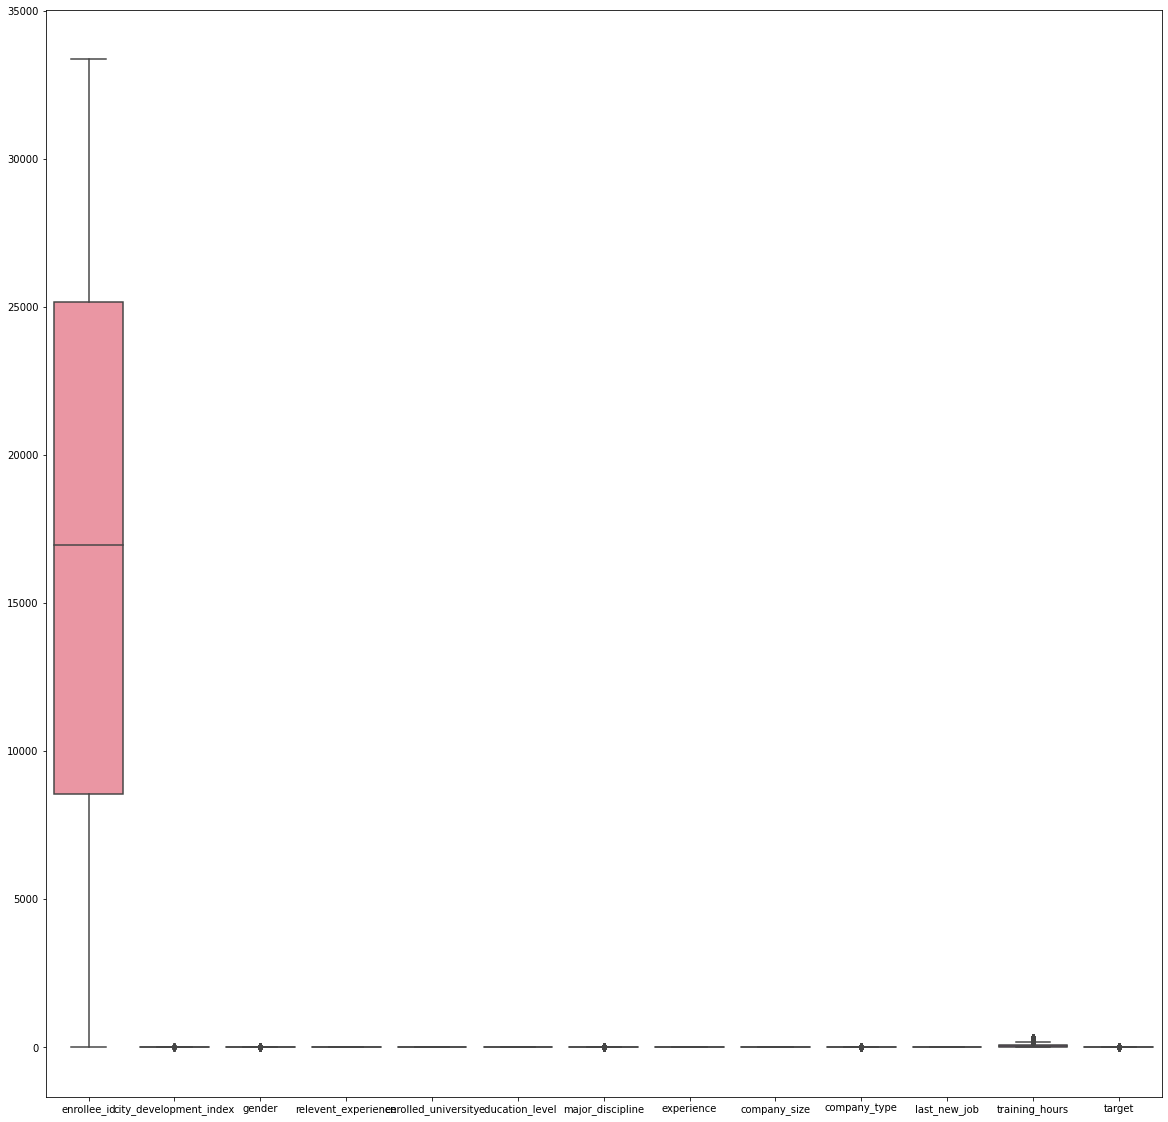

In [38]:
%matplotlib inline
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df , ax=ax)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
y=df['target']
x=df.drop(columns='target')
Y=df['target']
X=df.drop(columns='target')

In [42]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=100)


In [43]:
# #feature Scaling  
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# x_train= st_x.fit_transform(x_train)    
# x_test= st_x.transform(x_test)

In [44]:
model=DecisionTreeClassifier()
model.fit(x,y) 
model.score(X,Y)

1.0

In [45]:
import sklearn 
from sklearn import tree
# %matplotlib inline
# plt.figure(figsize=(20,20))
# tree.plot_tree(model,filled=True)
# plt.show()

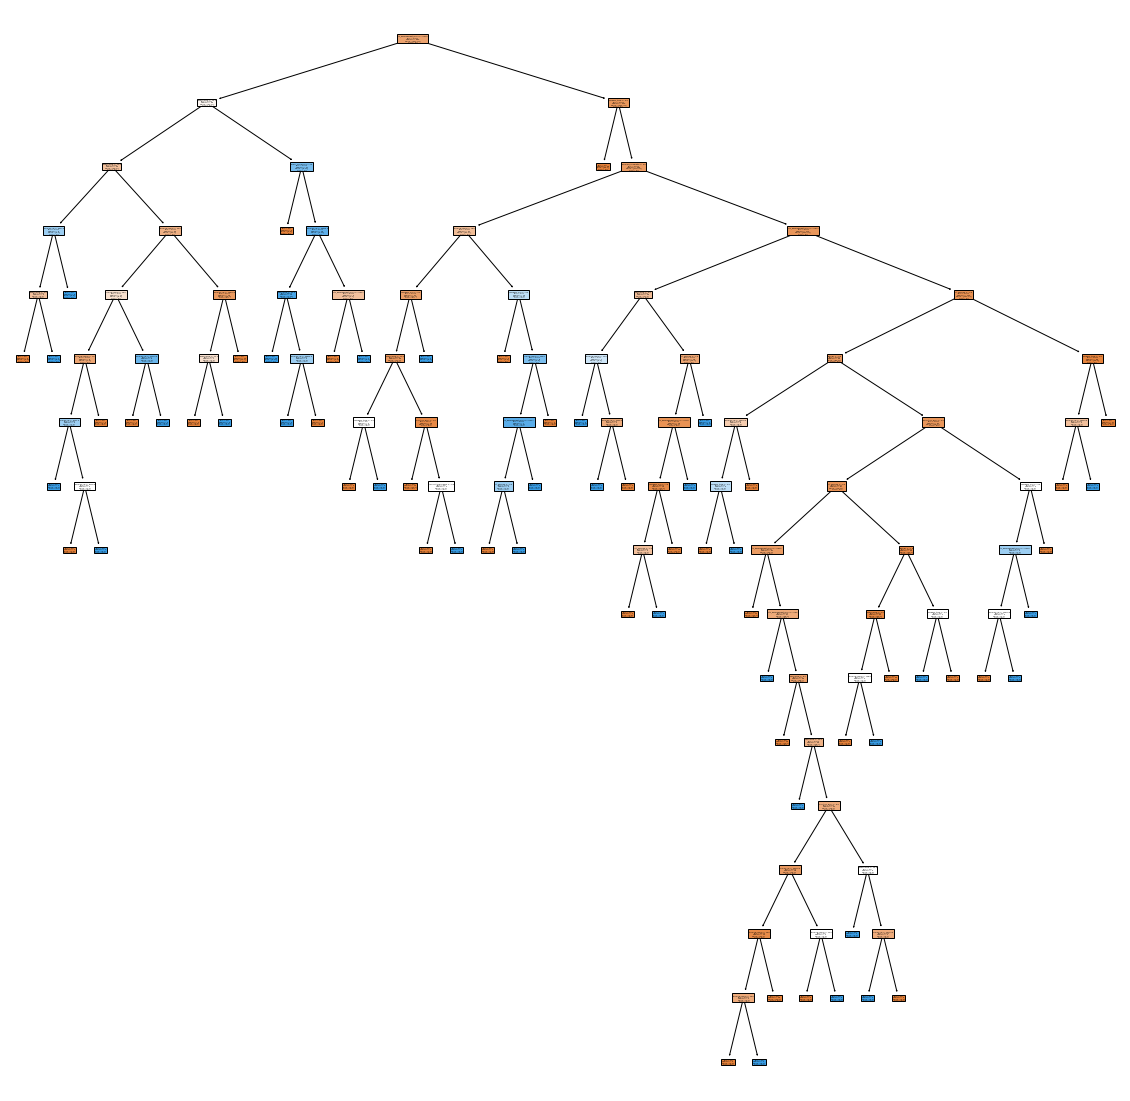

In [46]:
df1=df.head(300)
x1=df1.drop(columns='target')
y1=df1.target
dt_model=DecisionTreeClassifier()
dt_model.fit(x1,y1)
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True,class_names=[str(i) for i in set(y1)],feature_names=x1.columns) 
#classes converted into strings because class_names attribute only support strings so we convert numerical into string list
plt.show()

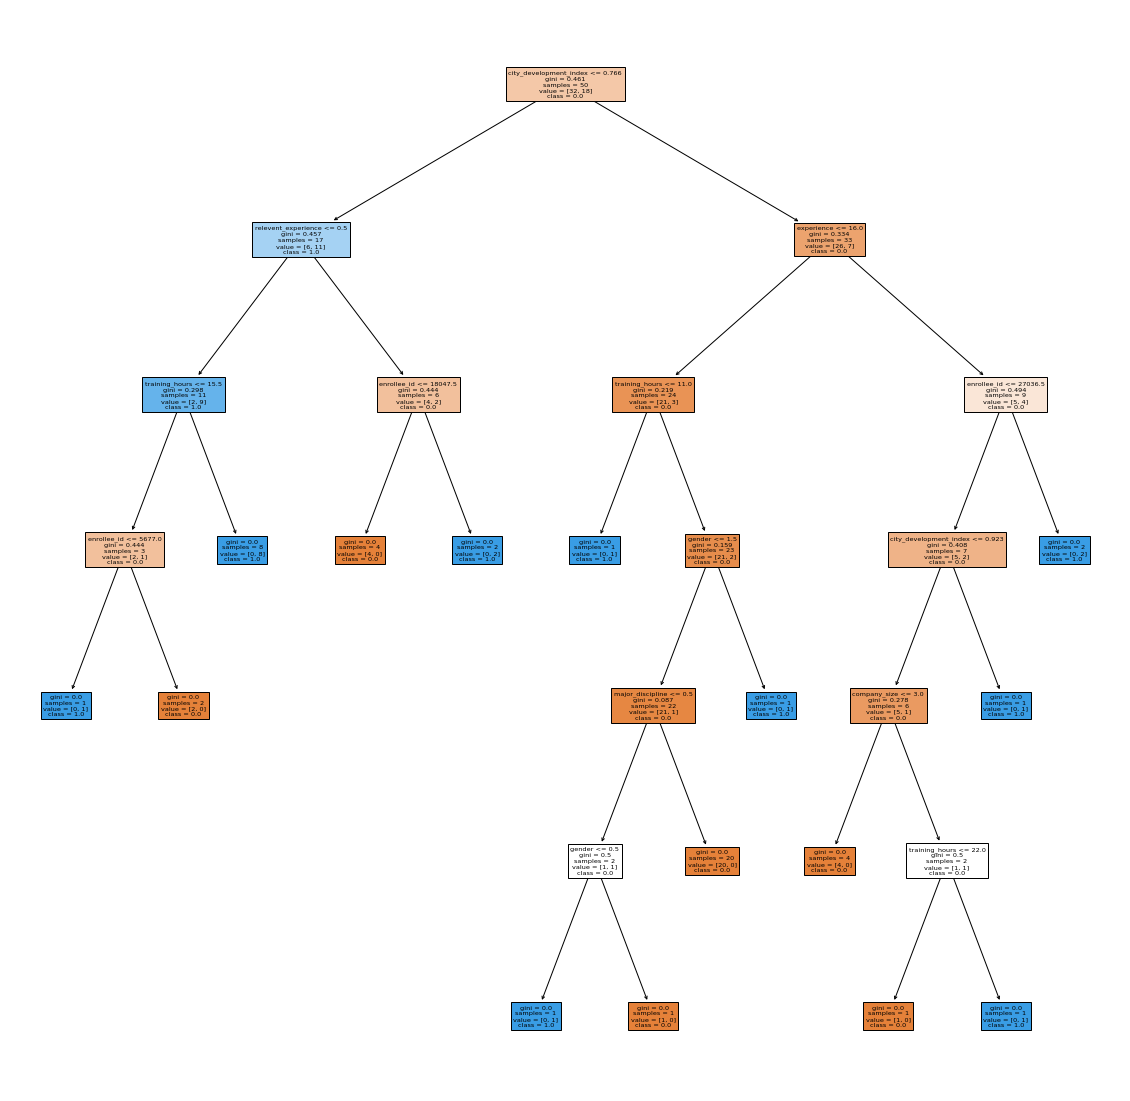

In [47]:
df1=df.head(50)
x1=df1.drop(columns='target')
y1=df1.target
dt_model=DecisionTreeClassifier()
dt_model.fit(x1,y1)
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True,class_names=[str(i) for i in set(y1)],feature_names=x1.columns) 
#classes converted into strings because class_names attribute only support strings so we convert numerical into string list
plt.show()

In [56]:
DecisionTreeClassifier()

grid_pram={"criterion":['gini','entropy'],
          "splitter":['best','random'],
          "max_depth":range(2,40,1),
          "min_samples_split":range(2,10,1),
          "min_samples_leaf":range(1,10,1)}

In [57]:
dt_model_ccp=DecisionTreeClassifier(random_state=0,ccp_alpha=0.014)
dt_model_ccp.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

In [58]:
dt_model_ccp.score(X,Y)

0.7823363607892264

In [59]:
d=dt_model_ccp.get_params()

In [60]:
d

{'ccp_alpha': 0.014,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [62]:
grid_ccp=GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram,cv=5,n_jobs=-1) # -1 in n_jobs means occupy all the process in cpu , if we inc like -4 then it will not execute all the  rocess as it will slow down processing speed

In [63]:
grid_ccp.fit(x,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [65]:
grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'random'}

In [66]:
# 3hyper parmeter tuning
dt_ccp_new=DecisionTreeClassifier(criterion='gini',max_depth=3,ccp_alpha=0.014,min_samples_leaf=6,min_samples_split=2,splitter='random')

In [68]:
dt_ccp_new.fit(x,y)
dt_ccp_new.score(x,y)
dt_ccp_new.score(X,Y)

0.7506524689424784

In [69]:
dt_ccp_new.get_params()

{'ccp_alpha': 0.014,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [70]:
from sklearn.metrics import confusion_matrix  
pred =dt_ccp_new.predict(X)
confusion_matrix(Y,pred)

array([[14381,     0],
       [ 4777,     0]])

In [73]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X,Y)
y_pred= classifier.predict(X)

In [75]:
classifier.score(X,Y)

0.9811044994258273

In [76]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs =-1,max_features=5)
RFC.fit(x,y)
y_pred = RFC.predict(X)
accuracy_score(Y, y_pred)

0.980634721787243

In [77]:
rf= RandomForestClassifier(n_estimators = 1000, max_depth = 7, random_state=0).fit(x, y)

In [78]:
rf.score(X,Y)

0.7952813446079967

In [79]:
DTC = DecisionTreeClassifier(max_depth=25,criterion='gini',max_features=8)
DTC.fit(x,y)
y_pred = DTC.predict(X)
accuracy_score(Y, y_pred)

0.9836099801649442

In [83]:
from sklearn.linear_model import LogisticRegression
# X_train, X_valid, y_train, y_valid = train_test_split(df, y, shuffle=True, random_state=1, test_size=0.3)
model_log = LogisticRegression()
model_log.fit(x,y)

predictions = model_log.predict(X)
model_log.score(X,Y)

0.7486167658419459

In [84]:
model_log.score(x,y)

0.7486167658419459

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, Y)

0.7486167658419459

In [86]:
import pickle
pickle.dump(classifier, open('model.h5', 'wb'))

In [90]:
loaded_model = pickle.load(open('model.h5', 'rb'))

In [107]:
a=x.iloc[100]

In [108]:
a

enrollee_id               6172.00
city_development_index       0.55
gender                       1.00
relevent_experience          0.00
enrolled_university          2.00
education_level              0.00
major_discipline             5.00
experience                  18.00
company_size                 1.00
company_type                 5.00
last_new_job                 0.00
training_hours              24.00
Name: 100, dtype: float64

In [109]:
X

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0.920,1,0,2,0,5,21,4,5,0,36
1,29725,0.776,1,1,2,0,5,6,4,5,4,47
2,11561,0.624,1,1,0,0,5,15,4,5,5,83
3,33241,0.789,1,1,2,0,1,20,4,5,5,52
4,666,0.767,1,0,2,2,5,21,4,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1,1,2,0,2,5,4,5,0,42
19154,31398,0.920,1,0,2,0,5,5,4,5,3,52
19155,24576,0.920,1,0,2,0,5,21,4,5,3,44
19156,5756,0.802,1,0,2,1,5,20,5,5,1,97


In [110]:
loaded_model.predict([a])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [111]:
df.iloc[100]

enrollee_id               6172.00
city_development_index       0.55
gender                       1.00
relevent_experience          0.00
enrolled_university          2.00
education_level              0.00
major_discipline             5.00
experience                  18.00
company_size                 1.00
company_type                 5.00
last_new_job                 0.00
training_hours              24.00
target                       1.00
Name: 100, dtype: float64